In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [12]:
no_consec = pd.read_csv('../data/no_consec.csv')

C:\Users\jacob\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17,40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [29]:
no_consec = no_consec.rename(columns={'new_time_diff': 'hours_until_derate'})\
.drop(columns=['Unnamed: 0',
              'actionDescription',
               'index',
              'faultValue'])

In [76]:
no_consec['EventTimeStamp']= pd.to_datetime(no_consec['EventTimeStamp'])
no_consec['next_timestamp']= pd.to_datetime(no_consec['next_timestamp'])

In [77]:
no_consec = no_consec[(no_consec['EventTimeStamp'].dt.year >=2015) & (no_consec['EventTimeStamp'].dt.year <=2022)]

In [78]:
no_consec = no_consec[(no_consec['next_timestamp'].dt.year >=2015) & (no_consec['next_timestamp'].dt.year <=2022)]

In [81]:
pd.set_option('display.max_columns', 100)
derates = no_consec[no_consec['hours_until_derate'].notna()]

In [82]:
subset = ['EventTimeStamp',
          'EquipmentID',
          'full_derate', 
          'derate_cumulative',
          'derate_cumu_diff',
          'time_diff_next_h',
          'hours_until_derate',
         'next_timestamp',
         'updated_time']

In [83]:
pd.set_option('display.max_rows', 700)

derates[subset].head(500)

,EventTimeStamp,EquipmentID,full_derate,derate_cumulative,derate_cumu_diff,time_diff_next_h,hours_until_derate,next_timestamp,updated_time
48,2015-02-25 13:53:08,1329,0,0,0.0,0.000000,0.000000,2015-04-15 08:58:11,0.000000
49,2015-02-25 13:53:08,1329,1,1,1.0,0.000000,0.000000,2015-02-25 13:53:08,0.000000
50,2015-02-25 13:53:08,1329,0,1,0.0,0.000000,0.000000,2015-02-25 13:53:08,0.000000
51,2015-02-25 13:53:08,1329,0,1,0.0,0.000000,0.000000,2015-02-25 13:53:08,0.000000
52,2015-02-25 14:47:20,1329,0,1,0.0,0.903333,0.000000,2015-02-25 13:53:08,0.000000
53,2015-02-25 15:38:07,1329,0,1,0.0,0.846389,0.000000,2015-02-25 14:47:20,0.000000
54,2015-02-25 19:36:42,1329,0,1,0.0,3.976389,0.000000,2015-02-25 15:38:07,0.000000
55,2015-02-25 19:36:42,1329,0,1,0.0,0.000000,0.000000,2015-02-25 19:36:42,0.000000
56,2015-02-25 19:36:42,1329,0,1,0.0,0.000000,0.000000,2015-02-25 19:36:42,0.000000
57,2015-04-14 01:31:28,1329,0,1,0.0,1133.912778,0.000000,2015-02-25 19:36:42,0.000000


<AxesSubplot:>

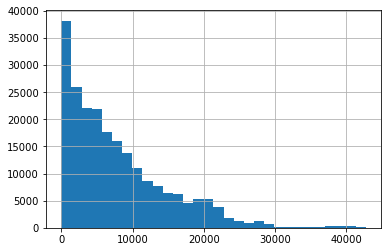

In [96]:
derates[~((derates['updated_time'] == 0 ) & 
        (derates['full_derate'] == 0))]['hours_until_derate'].hist(bins = 30)

In [85]:
derates[derates['hours_until_derate']==derates.hours_until_derate.max()]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,derate,full_derate,derate_cumulative,derate_cumu_diff,next_timestamp,time_diff_next,time_diff_next_h,updated_time,hours_until_derate
1033234,121,991866,2015-02-21 12:52:42,NaN,unknown,unknown,unknown,unknown,0,5396,1,True,126,302,105435601,35.885416,-86.477731,2015-02-21 13:09:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,17407.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,384,0.0,2015-02-21 12:52:42,0 days 00:00:00,0.000000,0.000000,42714.481111
1033235,296,994104,2015-02-21 15:40:56,NaN,unknown,unknown,unknown,unknown,0,5396,1,False,126,302,105435601,36.132175,-86.407361,2015-02-21 15:40:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,384,0.0,2015-02-21 12:52:42,0 days 02:48:14,2.803889,2.803889,42714.481111


In [87]:
(42714/24)/365

4.876027397260274

longest time truck went from first message to derate was 4 years

In [90]:
derates_for_descriptive = pd.DataFrame(derates.groupby(['EquipmentID', 'derate_cumulative'])['hours_until_derate'].max())

In [93]:
derates_for_descriptive[derates_for_descriptive['hours_until_derate'] > 0].hours_until_derate.mean() / 24

303.08184039468745

In [94]:
derates_for_descriptive[derates_for_descriptive['hours_until_derate'] > 0].hours_until_derate.median() / 24

111.00422453703705

mean time from first message to derate is 303 days. median is 111 days

In [118]:
first_derate = pd.DataFrame(derates_for_descriptive.reset_index().groupby('EquipmentID')['derate_cumulative'].min()).reset_index()

In [119]:
first_derate

,EquipmentID,derate_cumulative
0,301,384
1,302,384
2,304,389
3,305,390
4,306,403
5,1329,0
6,1339,1
7,1366,2
8,1373,5
9,1375,6


In [122]:
first_derate = pd.merge(first_derate, derates_for_descriptive, on = ['EquipmentID', 'derate_cumulative'])

In [129]:
first_derate['days_until_derate'] = first_derate['hours_until_derate'] / 24

In [142]:
data = first_derate[first_derate['hours_until_derate'] > 0]['days_until_derate']
fig = px.histogram(x=data,
                   labels = {'x':'Days Until Derate'},
                   title = 'Time from first Error until Derate', 
                   color_discrete_sequence=['green'])

fig.show()


look at how often error messages are

In [112]:
no_consec[no_consec['EquipmentID'] == 1487][subset]

,EventTimeStamp,EquipmentID,full_derate,derate_cumulative,derate_cumu_diff,time_diff_next_h,hours_until_derate,next_timestamp,updated_time
125608,2015-02-23 07:15:48,1487,0,52,0.0,0.000000,7.008056,2016-08-18 11:44:27,0.000000
125609,2015-02-23 07:16:03,1487,0,52,0.0,0.004167,7.008056,2015-02-23 07:15:48,0.004167
125610,2015-02-23 07:56:08,1487,0,52,0.0,0.668056,7.003889,2015-02-23 07:16:03,0.668056
125611,2015-02-23 09:16:02,1487,0,52,0.0,1.331667,6.335833,2015-02-23 07:56:08,1.331667
125612,2015-02-23 09:51:41,1487,0,52,0.0,0.594167,5.004167,2015-02-23 09:16:02,0.594167
125613,2015-02-23 10:36:50,1487,0,52,0.0,0.752500,4.410000,2015-02-23 09:51:41,0.752500
125614,2015-02-23 14:16:17,1487,0,52,0.0,3.657500,3.657500,2015-02-23 10:36:50,3.657500
125615,2015-02-23 15:54:22,1487,1,53,1.0,0.000000,0.000000,2015-02-23 14:16:17,0.000000
125616,2015-02-23 15:57:09,1487,0,53,0.0,0.046389,0.000000,2015-02-23 15:54:22,0.000000
125617,2015-02-23 16:00:17,1487,0,53,0.0,0.052222,0.000000,2015-02-23 15:57:09,0.000000


In [150]:
features = ['AcceleratorPedal', 'BarometricPressure',
       'CruiseControlActive', 'CruiseControlSetSpeed', 'DistanceLtd',
       'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure',
       'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel',
       'FuelLtd', 'FuelRate', 'FuelTemperature', 'IgnStatus',
       'IntakeManifoldTemperature', 'LampStatus', 'ParkingBrake',
       'ServiceDistance', 'Speed', 'SwitchedBatteryVoltage', 'Throttle',
       'TurboBoostPressure','hours_until_derate']

In [153]:
corrmatrix = no_consec[features].corr()

In [156]:
corrmatrix.style.background_gradient('coolwarm')

,AcceleratorPedal,BarometricPressure,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IntakeManifoldTemperature,LampStatus,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,hours_until_derate
AcceleratorPedal,1.000000,0.019523,0.060187,-0.048157,0.257024,0.669847,0.117630,0.024640,0.355932,-0.036018,0.014436,0.015904,0.023048,-0.019266,-0.075405,-0.015017,0.173819,0.016108,0.082105,0.021335,0.387251,0.032021
BarometricPressure,0.019523,1.000000,-0.020772,0.035716,0.173569,0.000185,0.683305,0.639283,0.396657,0.247853,0.084673,0.588897,0.636844,0.221816,0.137279,0.003528,-0.041908,0.603179,0.639623,0.013937,0.285626,-0.003644
CruiseControlSetSpeed,0.060187,-0.020772,1.000000,0.203011,0.057671,0.068412,-0.029331,-0.022302,0.054399,0.117569,-0.020699,-0.025169,-0.019741,-0.757783,-0.022176,-0.375677,0.081875,-0.020980,0.076608,0.026672,0.021955,0.015877
DistanceLtd,-0.048157,0.035716,0.203011,1.000000,0.007160,0.000093,0.028362,0.071331,0.028898,0.707998,0.020460,0.058198,0.057698,0.133411,-0.017588,-0.166079,-0.738060,0.070040,0.089556,0.051075,0.028832,-0.512434
EngineCoolantTemperature,0.257024,0.173569,0.057671,0.007160,1.000000,0.217048,0.175518,0.196203,0.336416,0.054750,0.004094,0.218576,0.176208,0.126820,0.507435,-0.016359,0.108224,0.152614,0.427432,0.078423,0.298446,-0.016038
EngineLoad,0.669847,0.000185,0.068412,0.000093,0.217048,1.000000,0.076838,0.002332,0.278285,-0.006429,0.006137,0.000054,0.001651,0.022810,-0.033735,-0.013117,-0.113666,0.000419,0.017917,0.020929,0.519871,0.002198
EngineOilPressure,0.117630,0.683305,-0.029331,0.028362,0.175518,0.076838,1.000000,0.689678,0.634539,0.251362,0.114487,0.712231,0.553750,0.285460,0.053162,-0.005185,0.433143,0.643617,0.846913,-0.017603,0.572092,0.007237
EngineOilTemperature,0.024640,0.639283,-0.022302,0.071331,0.196203,0.002332,0.689678,1.000000,0.272326,0.199394,0.119847,0.741017,0.692271,0.223413,0.144213,0.003628,0.468325,0.596275,0.742118,0.016912,0.301189,-0.003447
EngineRpm,0.355932,0.396657,0.054399,0.028898,0.336416,0.278285,0.634539,0.272326,1.000000,0.221499,0.046112,0.430205,0.513437,0.177883,-0.024555,-0.023727,0.403498,0.449597,0.595382,-0.015021,0.527622,0.003004
EngineTimeLtd,-0.036018,0.247853,0.117569,0.707998,0.054750,-0.006429,0.251362,0.199394,0.221499,1.000000,0.034731,0.298841,0.259607,0.231213,0.041234,-0.104009,-0.734053,0.325986,0.436095,0.054755,0.209419,-0.296825


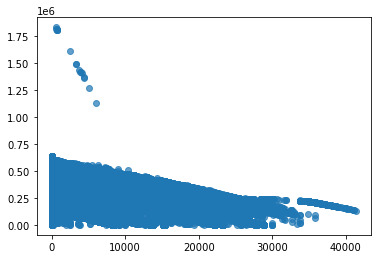

In [158]:
plt.scatter(x = no_consec['hours_until_derate'], y = no_consec['DistanceLtd'], alpha = 0.7)

In [181]:
first_error_count = pd.DataFrame(no_consec[no_consec['hours_until_derate'].isin(first_derate.hours_until_derate.to_list())]\
                                 ['spn'].value_counts()).reset_index()

In [238]:
within_day = no_consec[(no_consec['hours_until_derate'] > 0)
                       & (no_consec['hours_until_derate'] < 24)]

In [184]:
first_error_count['index'] = first_error_count['index'].astype(str)

In [215]:
first_error_count = first_error_count.rename(columns={'index':'spn', 'spn':'count'})

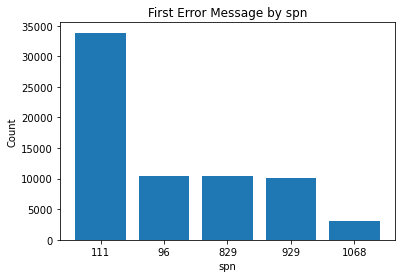

In [291]:
plt.bar(x = first_error_count['spn'].head(5), height=first_error_count['count'].head(5))
plt.xlabel('spn')
plt.ylabel('Count')
plt.title('First Error Message by spn');

In [198]:
no_consec[no_consec['spn'] == 111]['hours_until_derate'].std()/24

258.95784005259253

In [202]:
no_consec[no_consec['spn'] == 111]['hours_until_derate'].mean()/24

244.9122548658977

In [203]:
no_consec[no_consec['spn'] == 111]['DistanceLtd'].mean()

350355.5549709345

In [211]:
spn_avg_hours = pd.DataFrame(no_consec.groupby('spn')['hours_until_derate'].mean()).reset_index()

In [218]:
spn_avg_hours['spn']= spn_avg_hours['spn'].astype(str)

In [220]:
first_error_count = pd.merge(spn_avg_hours, first_error_count)

In [222]:
first_error_count = first_error_count.sort_values('count', ascending=False)

In [205]:
no_consec[no_consec['full_derate'] == 1]['DistanceLtd'].mean()

405842.49549181026

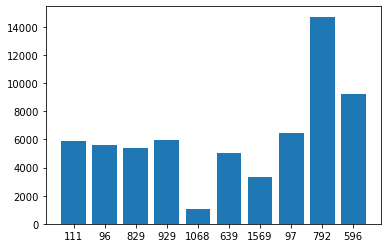

In [274]:
plt.bar(x = first_error_count['spn'].head(10), height=first_error_count['hours_until_derate'].head(10))
plt.Line2D(xdata = first_error_count['spn'].head(10), ydata=first_error_count['count'].head(10))


Text(0.5, 1.0, 'Error Messages that occur on day of Derate')

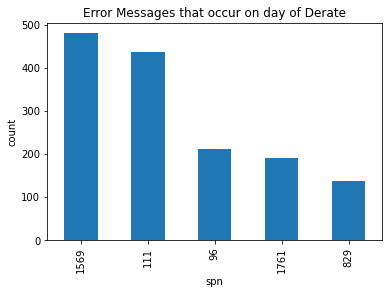

In [292]:
within_day['spn'].value_counts().head(5).plot(kind = 'bar')
plt.xlabel('spn')
plt.ylabel('count')
plt.title('Error Messages that occur on day of Derate')

In [258]:
dist_piv = no_consec.drop_duplicates('hours_until_derate').pivot(index = 'hours_until_derate', columns = 'EquipmentID', values = 'DistanceLtd').rename_axis(None)

In [263]:
no_consec['spn'].value_counts()

111       343986
929       227581
96         82272
829        81724
639        31346
97         24565
596        21699
50353      11253
1569        9550
1761        7791
2863        7737
1068        7173
629         7137
789         6831
791         6677
1067        5186
37          4842
641         4798
412         4763
792         4656
91          4573
3226        4491
790         4411
807         4383
3216        4150
1231        3822
51923       3703
1807        3585
1059        3480
611         3440
802         3438
793         3381
171         3262
627         3086
3251        2843
3464        2816
886         2595
157         2130
102         2127
70          1963
4364        1944
630         1849
4096        1740
5396        1641
1045        1621
907         1602
523531      1550
110         1479
934         1404
1209        1402
5848        1393
1808        1386
3821        1321
248         1319
797         1315
101         1313
5444        1301
3610        1288
411         12

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,derate,full_derate,derate_cumulative,derate_cumu_diff,next_timestamp,time_diff_next,time_diff_next_h,updated_time,hours_until_derate
1724,84717,2909659,2015-06-11 16:56:54,NaN,unknown,unknown,unknown,unknown,49,50353,0,True,2,1339,105366200,38.392546,-82.422546,2015-06-11 16:57:30,0.0,14.2100,False,66.48672,581309.0,185.0,13.0,16.24,209.46880,649.625,11008.00,54.8,89147.236496,0.726475,NaN,True,165.2,2.0,True,NaN,0.000000,3276.75,NaN,0.58,0,0,1,0.0,2015-06-11 12:56:33,0 days 04:00:21,4.005833,4.005833,19.461667
1725,84721,2909709,2015-06-11 16:59:47,NaN,unknown,unknown,unknown,unknown,49,50353,0,False,2,1339,105366200,38.392546,-82.422546,2015-06-11 16:59:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0.0,2015-06-11 16:56:54,0 days 00:02:53,0.048056,0.048056,15.455833
1726,85114,2917183,2015-06-11 21:20:36,Not Reporting Data Catalyst Dosing Unit Input ...,unknown,unknown,unknown,unknown,0,3362,7,True,1,1339,105366200,36.944583,-80.943009,2015-06-12 06:30:59,0.0,13.6300,False,66.48672,581492.1,186.8,26.0,15.66,212.11250,649.375,11012.20,42.0,89187.786906,1.756750,NaN,True,120.2,17407.0,True,NaN,0.000000,3276.75,NaN,2.32,0,0,1,0.0,2015-06-11 16:59:47,0 days 04:20:49,4.346944,4.346944,15.407778
1727,85202,2918566,2015-06-12 07:41:27,NaN,unknown,unknown,unknown,unknown,0,4363,0,True,1,1339,105366200,36.961203,-81.097361,2015-06-12 07:42:03,100.0,13.4850,False,66.48672,581501.7,203.0,100.0,32.48,223.25000,1237.500,11012.60,31.6,89191.485315,17.659960,NaN,True,118.4,21503.0,False,NaN,58.933170,3276.75,NaN,29.00,0,0,1,0.0,2015-06-11 21:20:36,0 days 10:20:51,10.347500,10.347500,11.060833
1728,85224,2919016,2015-06-12 07:59:36,NaN,unknown,unknown,unknown,unknown,0,4363,0,False,1,1339,105366200,36.960000,-81.102222,2015-06-12 07:59:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0.0,2015-06-12 07:41:27,0 days 00:18:09,0.302500,0.302500,0.713333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044638,1078364,68104294,2018-11-12 11:59:48,Error in System Engine Torque Limit Request - ...,PC4__1284P4C_6*,Y048665,MX16U13D13,PCAR,0,1787,11,True,7,305,105362919,38.192407,-85.707685,2018-11-12 12:24:02,15.6,14.5725,False,0.00000,279340.0,150.8,19.0,75.40,154.00630,1158.000,10796.35,40.0,44665.021778,2.879484,118.4,True,105.8,2047.0,False,NaN,1.451484,NaN,15.6,1.74,0,0,400,0.0,2018-11-12 10:43:35,0 days 01:16:13,1.270278,1.270278,1.270278
1044641,1080382,68546697,2018-11-16 10:08:34,Error in System Engine Torque Limit Request - ...,PC4__1284P4C_6*,Y048665,MX16U13D13,PCAR,0,1787,11,True,12,305,105362919,38.192546,-85.707546,2018-11-16 10:09:40,0.0,14.5000,False,0.00000,279374.4,53.6,19.0,87.00,51.96875,950.000,10799.55,38.0,44670.701477,2.337930,41.0,True,41.0,2047.0,True,NaN,0.000000,NaN,0.0,1.16,0,0,401,0.0,2018-11-15 13:01:16,0 days 21:07:18,21.121667,21.121667,21.121667
1044646,1082040,68971840,2018-11-20 14:14:41,Low (Severity Medium) Engine Coolant Level,PC4__1284P4C_6*,Y048665,MX16U13D13,PCAR,0,111,18,False,1,305,105362919,38.191944,-85.708472,2018-11-20 14:14:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2047.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,402,0.0,2018-11-20 14:12:25,0 days 00:0

In [268]:
no_consec[no_consec['spn'] == 1068]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,derate,full_derate,derate_cumulative,derate_cumu_diff,next_timestamp,time_diff_next,time_diff_next_h,updated_time,hours_until_derate
20626,240090,5165140,2015-10-13 14:19:32,Incorrect Data Brake Signal Sensor 2,unknown,unknown,unknown,unknown,11,1068,2,True,127,1374,105387539,35.957870,-86.444953,2015-10-13 14:20:08,100.0,14.2825,False,57.78752,559682.3,190.4,69.0,35.38,213.1812,1430.000,11343.35,90.0,84791.567702,11.042430,NaN,True,116.6,1279.0,NaN,NaN,67.088670,NaN,NaN,14.21,0,0,6,0.0,2015-10-10 08:36:09,3 days 05:43:23,77.723056,NaN,NaN
20740,360392,7082508,2016-01-26 16:49:44,Incorrect Data Brake Signal Sensor 2,unknown,unknown,unknown,unknown,11,1068,2,True,127,1374,105420909,36.299074,-86.263472,2016-01-26 16:50:19,0.0,14.5000,False,66.48672,584564.9,170.6,32.0,16.24,196.4750,663.625,11839.50,57.2,88770.791322,1.096317,NaN,True,66.2,1279.0,NaN,NaN,3.077729,NaN,NaN,0.87,0,0,6,0.0,2016-01-26 16:39:36,0 days 00:10:08,0.168889,NaN,NaN
20743,360397,7082591,2016-01-26 16:53:55,Incorrect Data Brake Signal Sensor 2,unknown,unknown,unknown,unknown,11,1068,2,False,127,1374,105420909,36.346574,-86.256018,2016-01-26 16:53:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1279.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,6,0.0,2016-01-26 16:53:16,0 days 00:00:39,0.010833,NaN,NaN
20744,360471,7084397,2016-01-26 18:29:00,Incorrect Data Brake Signal Sensor 2,unknown,unknown,unknown,unknown,11,1068,2,True,127,1374,105420909,36.877731,-85.661388,2016-01-26 18:29:35,2.8,14.2825,False,66.48672,584638.6,161.6,7.0,20.30,187.9250,645.375,11841.00,54.4,88781.490290,0.647223,NaN,True,62.6,1279.0,NaN,NaN,3.961241,NaN,NaN,0.58,0,0,6,0.0,2016-01-26 16:53:55,0 days 01:35:05,1.584722,NaN,NaN
20747,360474,7084436,2016-01-26 18:31:36,Incorrect Data Brake Signal Sensor 2,unknown,unknown,unknown,unknown,11,1068,2,False,127,1374,105420909,36.877407,-85.661759,2016-01-26 18:31:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1279.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,6,0.0,2016-01-26 18:30:57,0 days 00:00:39,0.010833,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047951,352897,6965533,2016-01-20 11:36:38,Incorrect Data Brake Signal Sensor 2,unknown,unknown,unknown,unknown,11,1068,2,True,127,309,105442799,36.180740,-86.438287,2016-01-20 11:37:14,87.2,14.4275,False,64.62260,134111.7,183.2,71.0,38.86,218.9750,1337.625,3261.90,52.0,19457.064146,10.580120,32.0,True,78.8,1279.0,False,NaN,65.010960,NaN,56.0,13.92,0,0,404,0.0,2016-01-20 11:10:46,0 days 00:25:52,0.431111,NaN,NaN
1048756,636365,12803723,2016-11-16 05:06:07,Incorrect Data Brake Signal Sensor 2,BB41103* BB41104*,S221411247,EC60-adv,BNDWS,11,1068,2,True,127,309,105442799,35.940879,-86.437083,2016-11-16 05:06:43,0.0,14.3550,True,64.62260,168703.3,185.0,78.0,41.18,186.1250,1331.250,4736.05,74.4,24703.124841,12.125540,NaN,True,80.6,1279.0,False,NaN,64.816780,NaN,45.6,16.24,0,0,404,0.0,2016-11-15 16:04:35,0 days 13:01:32,13.025556,NaN,NaN
1049279,691060,13998369,2017-01-19 09:46:18,Incorrect Data Brake Signal Sensor 2,NaN,NaN,NaN,NaN,11,1068,2,False,127,309,105442799,36.730972,-87.477037,2017-01-19 09:46:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65535.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,404,0.0,2017-01-19 09:38:05,0 days 00:08:13,0.1369

In [277]:
no_consec['full_derate'].sum()

401

In [278]:
no_consec['derate'].sum()

9951

In [285]:
len(no_consec[no_consec['spn'] == 1569].EquipmentID.unique())

491